### Analyse exploratoire des données (EDA)

##### 1. Charger les données

In [1]:
import pandas as pd

data = pd.read_csv('../data/raw/data.csv')


- Affichage

In [23]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


##### 2. Inspecter la structure du dataset

- Dimensions

In [17]:
dimensions = data.shape

print('Nombres de lignes:   ', dimensions[0])
print('Nombres de colonnes: ', dimensions[1])

Nombres de lignes:    14640
Nombres de colonnes:  13


- Colonnes et types

In [16]:
print('Liste des colonnes:')

for col, col_type in dict(data.dtypes).items():
    print(f"\t - {col :30s} - {col_type}")

Liste des colonnes:
	 - tweet_id                       - float64
	 - airline_sentiment              - object
	 - airline_sentiment_confidence   - float64
	 - negativereason                 - object
	 - negativereason_confidence      - float64
	 - airline                        - object
	 - name                           - object
	 - retweet_count                  - int64
	 - text                           - object
	 - tweet_coord                    - object
	 - tweet_created                  - object
	 - tweet_location                 - object
	 - user_timezone                  - object


##### 3. Identifier et quantifier les valeurs manquantes par colonne

In [18]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

##### 4. Identifier les doublons

In [20]:
dublicates = int(data.duplicated().sum())

print('Le nombre des lignes doublons:', dublicates)

Le nombre des lignes doublons: 39


##### 5. Analyser la répartition des classes de sentiment

- Le nombre de samples de chaque classe

In [26]:
data.groupby('airline_sentiment')[['airline_sentiment_confidence', 'negativereason', 'text']].count()

,airline_sentiment_confidence,negativereason,text
airline_sentiment,,,
negative,9178,9178,9178
neutral,3099,0,3099
positive,2363,0,2363


- Les statistiques de la colonnes `airline_sentiment_confidence`

In [22]:
data['airline_sentiment_confidence'].describe()

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

- Le nombre de sentiements (samples) de chaque airline

In [34]:
data.groupby(['airline'])['airline_sentiment'].count().sort_values(ascending=False)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64

- La répartition de classes par rapport a chaque airline

In [38]:
data.groupby(['airline', 'airline_sentiment'])['airline_sentiment_confidence'].count()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment_confidence, dtype: int64

- Le nombre des sentiments negative pour chaque airline

In [40]:
data[data['airline_sentiment'] == 'negative'].groupby(['airline'])['airline_sentiment_confidence'].count().sort_values(ascending=False)

airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: airline_sentiment_confidence, dtype: int64

##### 6. Examiner la longueur et la fréquence des textes

In [56]:
data['text'].apply(lambda x: len(x.split())).describe()

count    14640.000000
mean        17.653415
std          6.882259
min          2.000000
25%         12.000000
50%         19.000000
75%         23.000000
max         36.000000
Name: text, dtype: float64

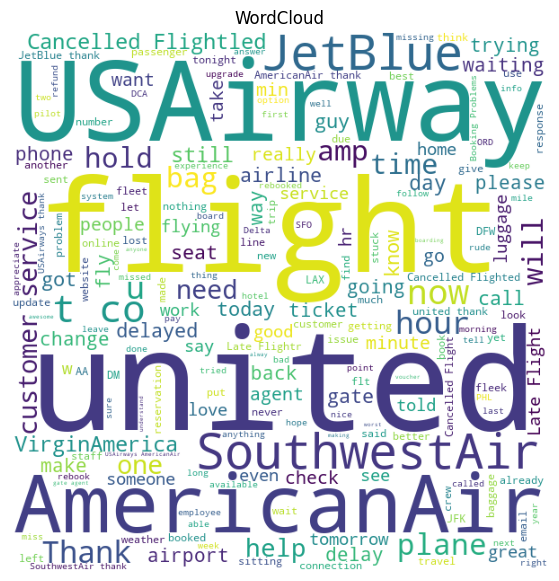

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texts = ' '.join(data['text'])

wc = WordCloud(width=600, height=600, background_color='#FFF').generate(text=texts)

plt.figure(figsize=(15, 7))
plt.title('WordCloud')
plt.axis(False)
plt.imshow(wc)
plt.show()
